## Sobel and Prewitt edge detection filters

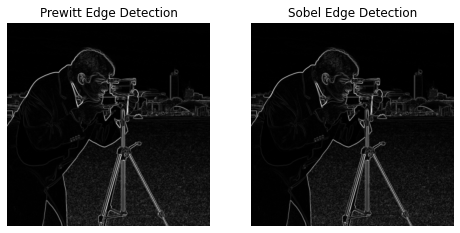

In [1]:
from skimage import filters
from skimage.data import camera
from skimage.util import compare_images
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
image = camera()
edge_prewitt = filters.prewitt(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_prewitt, cmap=plt.cm.gray)
axes[0].set_title('Prewitt Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.show()

In [2]:
# pip install skimage


The following command must be run outside of the IPython shell:

    $ pip install skimage

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


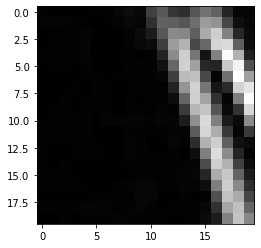

In [2]:
imshow(edge_sobel[150:170, 150:170], cmap='gray')

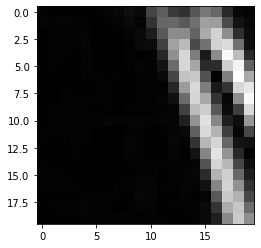

In [3]:
imshow(edge_prewitt[150:170, 150:170], cmap='gray')

(array([1.0000e+01, 1.1900e+02, 7.0600e+02, 2.8520e+03, 7.5230e+03,
        1.4032e+04, 1.8212e+04, 1.6549e+04, 1.0704e+04, 5.7070e+03,
        3.1320e+03, 2.3850e+03, 2.9150e+03, 4.3400e+03, 7.6710e+03,
        1.2937e+04, 1.8478e+04, 2.0848e+04, 1.9165e+04, 1.7446e+04,
        2.0144e+04, 2.2034e+04, 1.7926e+04, 1.0199e+04, 4.0140e+03,
        1.4130e+03, 4.7000e+02, 1.6300e+02, 3.9000e+01, 1.1000e+01]),
 array([-56.46426514, -44.38152195, -32.29877876, -20.21603557,
         -8.13329238,   3.9494508 ,  16.03219399,  28.11493718,
         40.19768037,  52.28042356,  64.36316675,  76.44590994,
         88.52865313, 100.61139632, 112.6941395 , 124.77688269,
        136.85962588, 148.94236907, 161.02511226, 173.10785545,
        185.19059864, 197.27334183, 209.35608501, 221.4388282 ,
        233.52157139, 245.60431458, 257.68705777, 269.76980096,
        281.85254415, 293.93528734, 306.01803052]),
 [<matplotlib.patches.Polygon at 0x7f9e2358e9d0>])

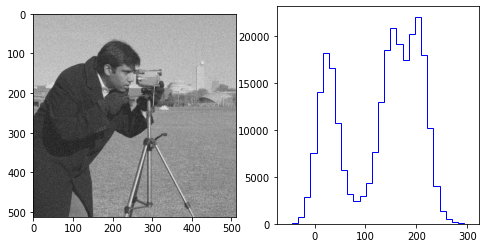

In [4]:
# degrade image by Gaussian noise
noiseSigma = 16.0
image = image + np.random.normal(0, noiseSigma, size=image.shape)

fig, axes = plt.subplots(ncols=2, sharex=False, sharey=False,
                         figsize=(8, 4))

axes[0].imshow(image, cmap='gray')
axes[1].hist(image.ravel(), bins=30, histtype='step', color='b' )

Text(0.5, 1.0, 'Sobel Edge Detection')

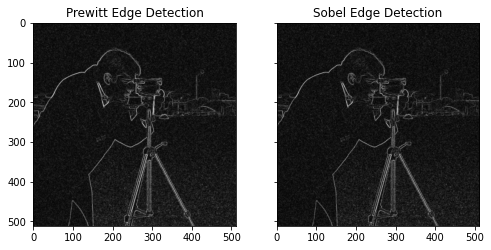

In [5]:
edge_prewitt = filters.prewitt(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_prewitt, cmap=plt.cm.gray)
axes[0].set_title('Prewitt Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')



In [6]:
# Smoothing filter (average)
from skimage.filters import rank
from skimage.morphology import disk
# convert to uint8 type
img_uint8 = image.astype(np.uint8)

(-0.5, 511.5, 511.5, -0.5)

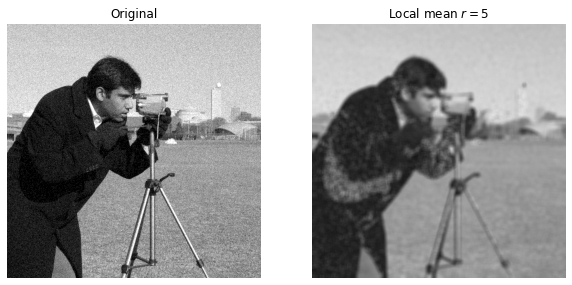

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 7], sharex=True, sharey=True)

loc_mean = rank.mean(img_uint8, disk(5))

ax1.imshow(image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')


ax2.imshow(loc_mean, vmin=0, vmax=255, cmap=plt.cm.gray)
ax2.set_title('Local mean $r=5$')
ax2.axis('off')


### Question 1:
1. Apply Sobel or Prewitt filter to the smoothed_image "local_mean" 
edge_prewitt = filters.prewitt(... ) or edge_sobel = filters.sobel(...)
2. Display a noisy image and a smoothed noisy image filtered by the filter of your choice using the following code

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))
axes[0].imshow(..., cmap=plt.cm.gray)
axes[0].set_title('...')
axes[1].imshow(..., cmap=plt.cm.gray)
axes[1].set_title('...')

3. Comment how image smoothing has influenced our ability to detect edges



Text(0.5, 1.0, 'With smoothed')

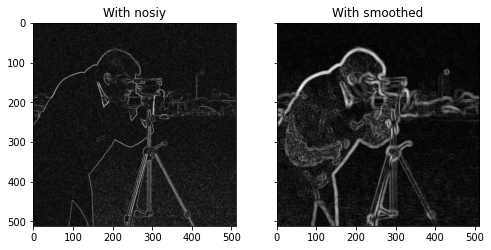

In [18]:
edge_noisy = filters.prewitt(image)
edge_smoothed = filters.prewitt(loc_mean)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

axes[0].imshow(edge_noisy, cmap=plt.cm.gray)
axes[0].set_title('With nosiy')

axes[1].imshow(edge_smoothed, cmap=plt.cm.gray)
axes[1].set_title('With smoothed')

Comments: applying Prewitt filter to noisy image gave more clear edges. Applying on smoothed image gave worse result, because edges are not clear and blurred, it seems like some areas got too light.

## Thresholding models

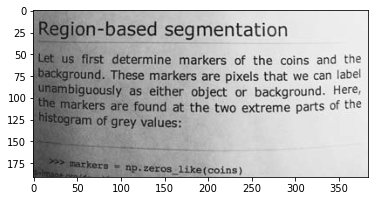

In [19]:
from skimage import data
from skimage.filters import try_all_threshold

img = data.page()
imshow(img, cmap='gray')

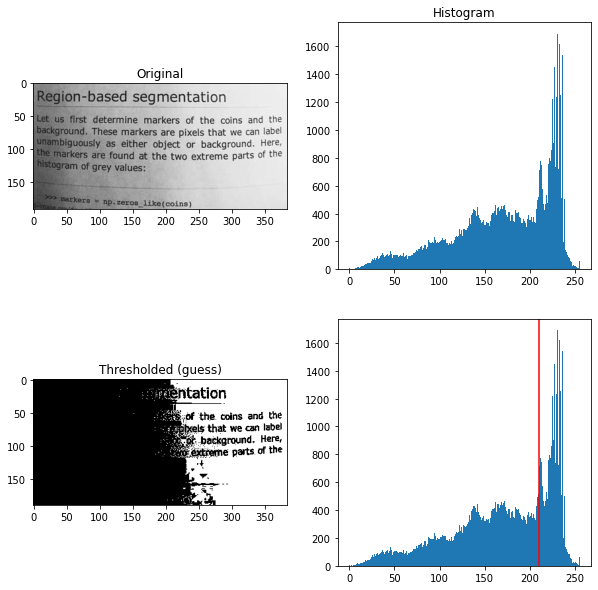

In [20]:
# Let's plot image intensity histogram and see if we can guess the best value of a threshold just by eyeballing
# the histogram distribution. We want to separate blacks from whites.
# Let's guess the threshold value thresh=210
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
thresh=210
binary=img>210
ax[0, 0].imshow(img, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(img.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

ax[1, 0].imshow(binary, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (guess)')

ax[1, 1].hist(img.ravel(), bins=256)
ax[1, 1].axvline(thresh, color='r')

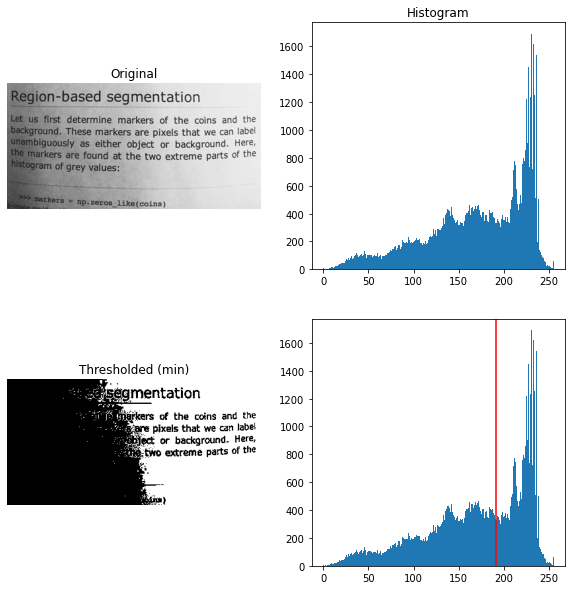

In [21]:
# Bimodal thresholding
from skimage.filters import threshold_minimum
thresh_m = threshold_minimum(img)
binary = img > thresh_m
#imshow(binary, cmap='gray')

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(img, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(img.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

ax[1, 0].imshow(binary, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (min)')

ax[1, 1].hist(img.ravel(), bins=256)
ax[1, 1].axvline(thresh_m, color='r')

for a in ax[:, 0]:
    a.axis('off')
plt.show()

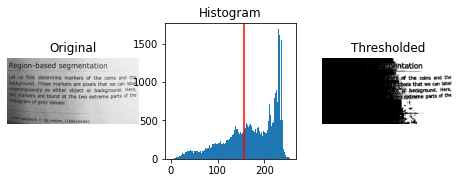

In [22]:
# Otsu's method
from skimage.filters import threshold_otsu

thresh_o = threshold_otsu(img)
binary = img > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(img.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh_o, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

###  Question 2: 1. Choose the size of the neighbourhood from where to calculate the local mean and standard deviation of pixerl intensities. For the size that you have chosen, how many adaptive threshold values have you obtained?  What is the difference between local and global thresholding approaches?  
### 2. Vary the size of the neighbourhood, for example, from 5 until 101, and observe the effect of the size on quality of the segmented image. Does the size of the neighbourhood matter at all? Which size have you found to be optimal (using your inspection)   

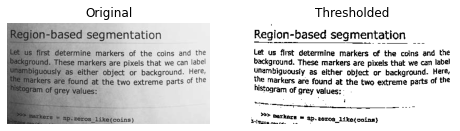

In [77]:
from skimage.filters import threshold_local
global_thresh = thresh_o

block_size = 41
adaptive_thresh = threshold_local(img, block_size, offset=10)
binary_adaptive = img > adaptive_thresh

fig, axes = plt.subplots(ncols=2, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(binary_adaptive, cmap=plt.cm.gray)
ax[1].set_title('Thresholded')
ax[1].axis('off')

plt.show()


In [49]:
# q1
adaptive_thresh.shape

(191, 384)

## block_size = ??? is optimal

In [101]:
import math
math.ceil(6 / 4)

2

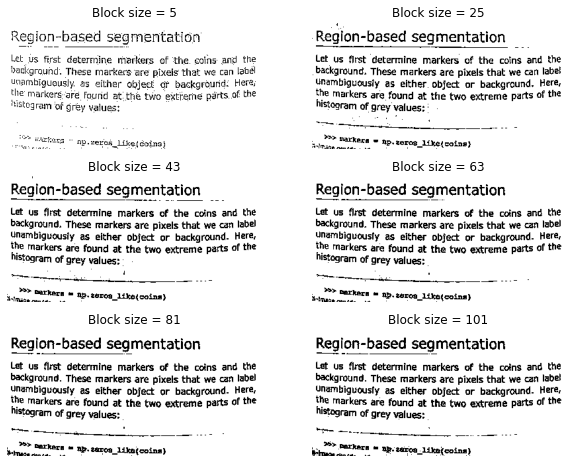

In [111]:
from skimage.filters import threshold_local
global_thresh = thresh_o

num = 6
cols = 2
fig, axes = plt.subplots(nrows=math.ceil(num / cols), ncols=2, figsize=(10, 8))
ax = axes.ravel()

for index, block_size in enumerate(int(num) + 1 if int(num) % 2 == 0 else int(num) for num in np.linspace(5, 101, num)):
    adaptive_thresh = threshold_local(img, block_size, offset=10)
    binary_adaptive = img > adaptive_thresh

    ax[math.ceil(index / cols)] = plt.subplot(math.ceil(num / cols), cols, index + 1)
    ax[math.ceil(index / cols)].imshow(binary_adaptive, cmap=plt.cm.gray)
    ax[math.ceil(index / cols)].set_title(f'Block size = {block_size}')
    ax[math.ceil(index / cols)].axis('off')

plt.show()

#### Q2
Yes block size matters, higher the block size, higher the contrast.
I think optimal size is around 31, since it is not too contrast and readable in this case.
